In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [3]:
pima = pd.read_csv("../.kaggle/datasets/uciml/pima-indians-diabetes-database/diabetes.csv")

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111bdb6d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1155d9b90>]], dtype=object)

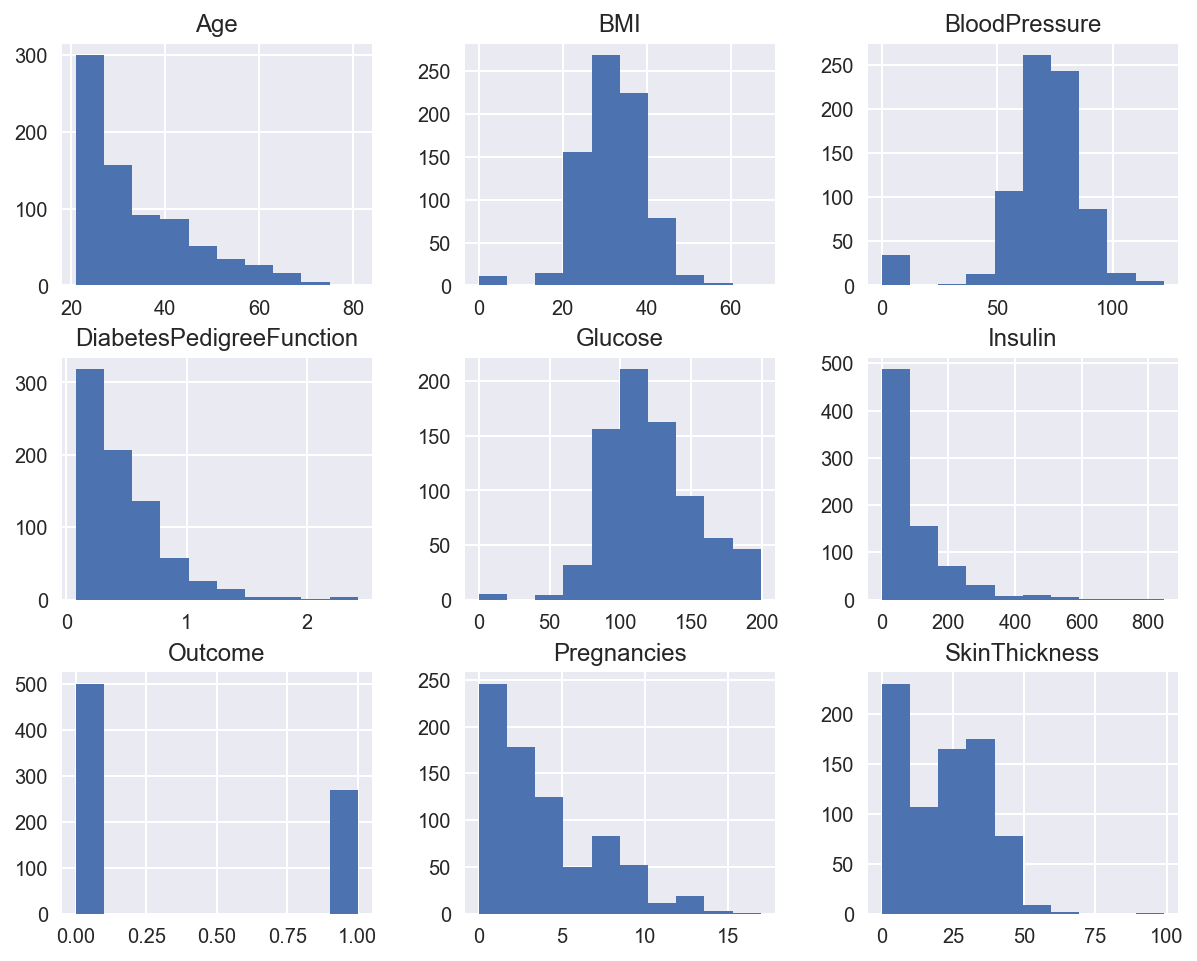

In [6]:
pima.hist(figsize=(10,8))

Pregnancies                    Axes(0.125,0.657941;0.227941x0.222059)
Glucose                     Axes(0.398529,0.657941;0.227941x0.222059)
BloodPressure               Axes(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  Axes(0.125,0.391471;0.227941x0.222059)
Insulin                     Axes(0.398529,0.391471;0.227941x0.222059)
BMI                         Axes(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          Axes(0.125,0.125;0.227941x0.222059)
Age                            Axes(0.398529,0.125;0.227941x0.222059)
Outcome                        Axes(0.672059,0.125;0.227941x0.222059)
dtype: object

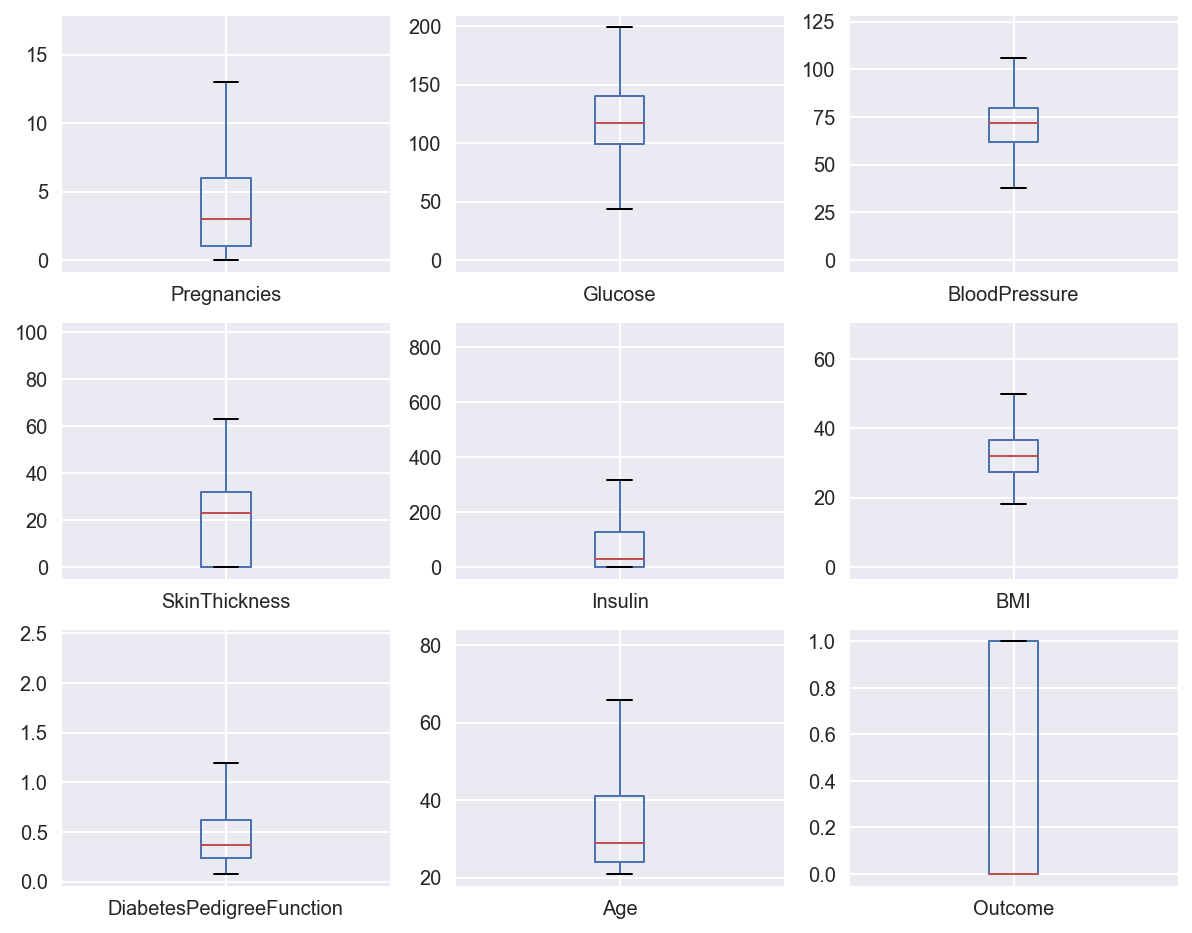

In [5]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [6]:
column_x = pima.columns[0:len(pima.columns) - 1]

In [7]:
column_x

Index([u'Pregnancies', u'Glucose', u'BloodPressure', u'SkinThickness',
       u'Insulin', u'BMI', u'DiabetesPedigreeFunction', u'Age'],
      dtype='object')

In [8]:
corr = pima[pima.columns].corr()

In [9]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


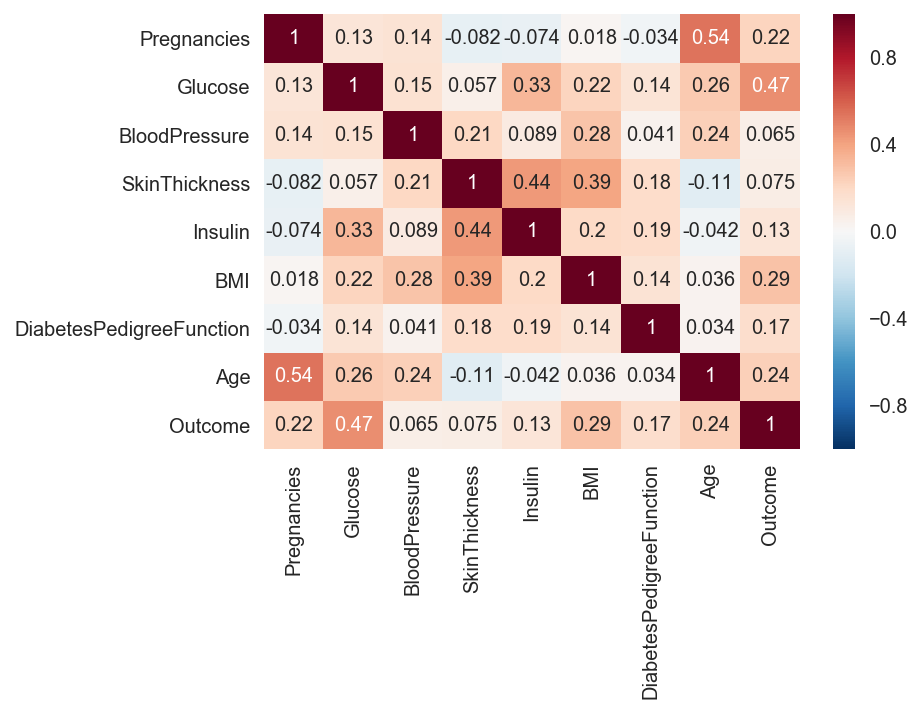

In [23]:
sns.heatmap(corr, annot = True)

# Feature Selection

In [7]:
X = pima.iloc[:,0:8]
Y = pima.iloc[:,8]
select_top_4 = SelectKBest(score_func=chi2, k = 4,)

In [8]:
fit = select_top_4.fit(X,Y)
features = fit.transform(X)
features[0:5]

array([[ 148. ,    0. ,   33.6,   50. ],
       [  85. ,    0. ,   26.6,   31. ],
       [ 183. ,    0. ,   23.3,   32. ],
       [  89. ,   94. ,   28.1,   21. ],
       [ 137. ,  168. ,   43.1,   33. ]])

In [9]:
X_features = pd.DataFrame(data = features, columns = ["Glucose","Insulin","BMI","Age"])

In [10]:
X_features.head()

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


# Normalisation

In [11]:
rescaledX = StandardScaler().fit_transform(X_features)

In [12]:
X = pd.DataFrame(data = rescaledX, columns= X_features.columns)

In [13]:
X.head()

,Glucose,Insulin,BMI,Age
0,0.848324,-0.692891,0.204013,1.425995
1,-1.123396,-0.692891,-0.684422,-0.190672
2,1.943724,-0.692891,-1.103255,-0.105584
3,-0.998208,0.123302,-0.494043,-1.041549
4,0.504055,0.765836,1.409746,-0.020496


In [14]:
X.describe()

,Glucose,Insulin,BMI,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,3.614007e-18,-3.556183e-17,2.295979e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-3.783654e+00,-6.928906e-01,-4.060474e+00,-1.041549e+00
25%,-6.852363e-01,-6.928906e-01,-5.955785e-01,-7.862862e-01
50%,-1.218877e-01,-4.280622e-01,9.419788e-04,-3.608474e-01
75%,6.057709e-01,4.120079e-01,5.847705e-01,6.602056e-01
max,2.444478e+00,6.652839e+00,4.455807e+00,4.063716e+00


Glucose       Axes(0.125,0.657941;0.227941x0.222059)
Insulin    Axes(0.398529,0.657941;0.227941x0.222059)
BMI        Axes(0.672059,0.657941;0.227941x0.222059)
Age           Axes(0.125,0.391471;0.227941x0.222059)
dtype: object

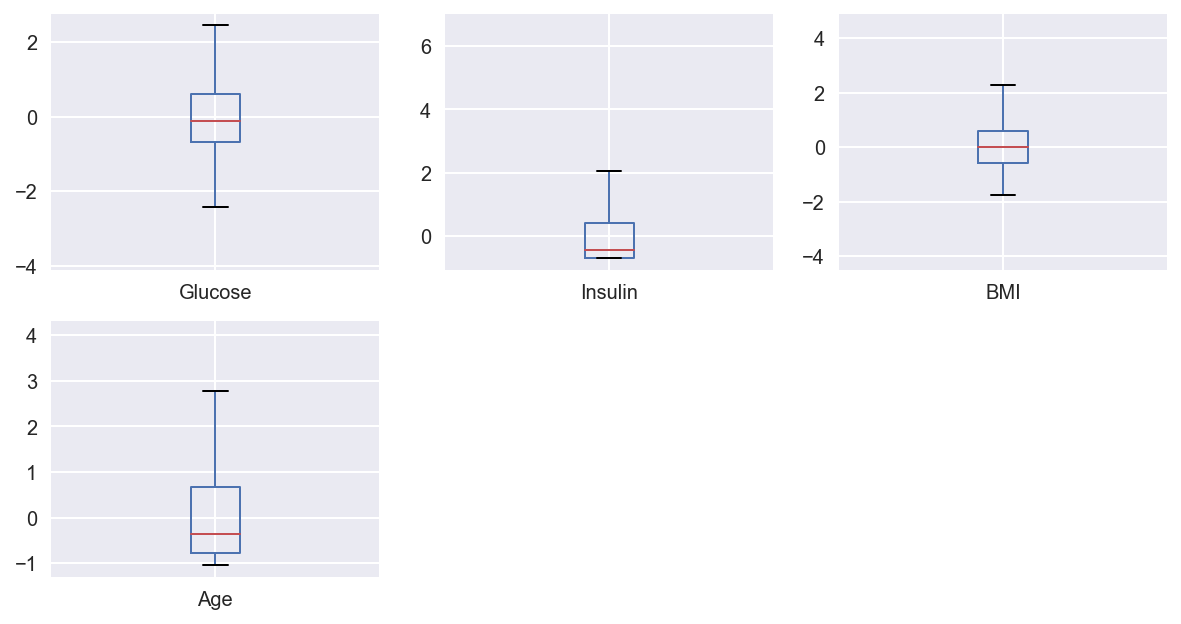

In [15]:
X.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

# Split into training and test

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 22, test_size = 0.2)

# Modelling

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

In [27]:
kfold = KFold(n_splits=10, random_state=22)
score =cross_val_score(GaussianNB(),X_train,Y_train, cv = kfold,scoring = "accuracy")

In [28]:
score.mean()

0.76049709148598621

# Testing Accuracy

In [29]:
lr = GaussianNB()
lr.fit(X_train,Y_train)
predictions = lr.predict(X_test)

In [30]:
print(accuracy_score(Y_test,predictions))

0.733766233766
